In [2]:
import numpy as np
import pandas as pd                               
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import joblib

In [4]:
#Path of dataset
folder1=r"C:\Users\piyus\OneDrive\Desktop\Sem_2\Computer Vision\CP_rug\REDCHILLI"
folder2=r"C:\Users\piyus\OneDrive\Desktop\Sem_2\Computer Vision\CP_rug\SUGAR"
folder3=r"C:\Users\piyus\OneDrive\Desktop\Sem_2\Computer Vision\CP_rug\HALDI"

In [8]:
#Applying BRISK Feature descriptor on folder1
i=0
k=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    try:
        img=cv2.resize(a,resize)
    except:
        continue
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
  
    csv_data=out.to_csv('folder1.csv', mode='a', header=False,index=False)
    k=k+1


descriptor shape  0  :  (2128, 64)
descriptor shape  1  :  (649, 64)
descriptor shape  2  :  (5883, 64)
descriptor shape  3  :  (854, 64)
descriptor shape  4  :  (869, 64)
descriptor shape  5  :  (950, 64)
descriptor shape  6  :  (1017, 64)
descriptor shape  7  :  (822, 64)
descriptor shape  8  :  (910, 64)
descriptor shape  9  :  (1183, 64)
descriptor shape  10  :  (1157, 64)
descriptor shape  11  :  (902, 64)
descriptor shape  12  :  (721, 64)
descriptor shape  13  :  (991, 64)
descriptor shape  14  :  (976, 64)
descriptor shape  15  :  (1022, 64)
descriptor shape  16  :  (1666, 64)
descriptor shape  17  :  (1503, 64)
descriptor shape  18  :  (1915, 64)
descriptor shape  19  :  (1665, 64)
descriptor shape  20  :  (996, 64)
descriptor shape  21  :  (878, 64)
descriptor shape  22  :  (1131, 64)
descriptor shape  23  :  (694, 64)
descriptor shape  24  :  (1202, 64)
descriptor shape  25  :  (724, 64)
descriptor shape  26  :  (567, 64)
descriptor shape  27  :  (1021, 64)
descriptor shape 

descriptor shape  225  :  (1148, 64)
descriptor shape  226  :  (846, 64)
descriptor shape  227  :  (1312, 64)
descriptor shape  228  :  (962, 64)
descriptor shape  229  :  (7389, 64)
descriptor shape  230  :  (6586, 64)
descriptor shape  231  :  (7382, 64)
descriptor shape  232  :  (6649, 64)
descriptor shape  233  :  (2751, 64)
descriptor shape  234  :  (2942, 64)
descriptor shape  235  :  (2615, 64)
descriptor shape  236  :  (2792, 64)
descriptor shape  237  :  (2633, 64)
descriptor shape  238  :  (8752, 64)
descriptor shape  239  :  (8388, 64)
descriptor shape  240  :  (8761, 64)
descriptor shape  241  :  (8390, 64)
descriptor shape  242  :  (753, 64)
descriptor shape  243  :  (762, 64)
descriptor shape  244  :  (755, 64)
descriptor shape  245  :  (3053, 64)
descriptor shape  246  :  (741, 64)
descriptor shape  247  :  (438, 64)
descriptor shape  248  :  (602, 64)
descriptor shape  249  :  (444, 64)
descriptor shape  250  :  (613, 64)
descriptor shape  251  :  (15678, 64)
descriptor

descriptor shape  448  :  (4726, 64)
descriptor shape  449  :  (5454, 64)
descriptor shape  450  :  (5316, 64)
descriptor shape  451  :  (977, 64)
descriptor shape  452  :  (1738, 64)
descriptor shape  453  :  (901, 64)
descriptor shape  454  :  (901, 64)
descriptor shape  455  :  (809, 64)
descriptor shape  456  :  (1472, 64)
descriptor shape  457  :  (1522, 64)
descriptor shape  458  :  (1495, 64)
descriptor shape  459  :  (1418, 64)
descriptor shape  460  :  (1040, 64)
descriptor shape  461  :  (975, 64)
descriptor shape  462  :  (1209, 64)
descriptor shape  463  :  (1566, 64)
descriptor shape  464  :  (1052, 64)
descriptor shape  465  :  (1176, 64)
descriptor shape  466  :  (1189, 64)
descriptor shape  467  :  (1033, 64)
descriptor shape  468  :  (1189, 64)
descriptor shape  469  :  (4654, 64)
descriptor shape  470  :  (4490, 64)
descriptor shape  471  :  (5169, 64)
descriptor shape  472  :  (4821, 64)
descriptor shape  473  :  (1384, 64)
descriptor shape  474  :  (1769, 64)
descri

In [9]:
#reading previously saved feature descriptor csv file of folder1 and save it into a dataframe
data1 = pd.read_csv('folder1.csv',header=None,dtype='uint8')

data1=data1.astype(np.uint8) 
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,27,195,237,15,0,0,0,0,0,...,127,183,65,0,0,236,0,0,0,0
1,176,59,199,233,239,0,0,0,0,0,...,255,255,217,0,0,236,51,0,0,0
2,0,120,223,231,225,1,0,0,0,0,...,103,167,121,22,64,0,0,0,0,0
3,128,123,199,225,236,221,59,0,0,0,...,181,255,241,72,62,219,4,56,0,0
4,128,123,207,225,237,223,17,0,0,0,...,181,55,248,182,0,128,118,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033200,132,43,69,9,0,80,121,16,0,0,...,123,50,133,0,0,192,32,8,25,24
2033201,32,251,159,0,64,24,0,82,64,0,...,243,255,255,255,18,8,0,0,0,0
2033202,1,51,0,9,196,159,61,0,134,172,...,247,253,30,76,254,39,16,8,16,48
2033203,132,122,223,231,239,207,7,0,128,138,...,147,91,209,60,5,130,18,0,16,16


In [10]:
#Applying BRISK Feature descriptor on folder1
i=0
k=0
for filename in os.listdir(folder2):
    #path
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    try:
        img=cv2.resize(a,resize)
    except:
        continue
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    

    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
  
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder2.csv', mode='a', header=False,index=False)
    k=k+1
#     if k==700:
#         break

descriptor shape  0  :  (5627, 64)
descriptor shape  1  :  (2378, 64)
descriptor shape  2  :  (2780, 64)
descriptor shape  3  :  (2518, 64)
descriptor shape  4  :  (2755, 64)
descriptor shape  5  :  (2622, 64)
descriptor shape  6  :  (5741, 64)
descriptor shape  7  :  (5587, 64)
descriptor shape  8  :  (5947, 64)
descriptor shape  9  :  (6015, 64)
descriptor shape  10  :  (6194, 64)
descriptor shape  11  :  (6236, 64)
descriptor shape  12  :  (6515, 64)
descriptor shape  13  :  (6412, 64)
descriptor shape  14  :  (1275, 64)
descriptor shape  15  :  (1224, 64)
descriptor shape  16  :  (1255, 64)
descriptor shape  17  :  (1175, 64)
descriptor shape  18  :  (1238, 64)
descriptor shape  19  :  (1224, 64)
descriptor shape  20  :  (1257, 64)
descriptor shape  21  :  (1189, 64)
descriptor shape  22  :  (5115, 64)
descriptor shape  23  :  (5405, 64)
descriptor shape  24  :  (5456, 64)
descriptor shape  25  :  (5463, 64)
descriptor shape  26  :  (5697, 64)
descriptor shape  27  :  (6154, 64)
de

descriptor shape  225  :  (3924, 64)
descriptor shape  226  :  (42, 64)
descriptor shape  227  :  (2493, 64)
descriptor shape  228  :  (2472, 64)
descriptor shape  229  :  (2238, 64)
descriptor shape  230  :  (102, 64)
descriptor shape  231  :  (2328, 64)
descriptor shape  232  :  (2869, 64)
descriptor shape  233  :  (2931, 64)
descriptor shape  234  :  (2652, 64)
descriptor shape  235  :  (2678, 64)
descriptor shape  236  :  (1839, 64)
descriptor shape  237  :  (1666, 64)
descriptor shape  238  :  (1883, 64)
descriptor shape  239  :  (1920, 64)
descriptor shape  240  :  (1727, 64)
descriptor shape  241  :  (38, 64)
descriptor shape  242  :  (1745, 64)
descriptor shape  243  :  (1607, 64)
descriptor shape  244  :  (1654, 64)
descriptor shape  245  :  (1432, 64)
descriptor shape  246  :  (1325, 64)
descriptor shape  247  :  (1382, 64)
descriptor shape  248  :  (1403, 64)
descriptor shape  249  :  (1348, 64)
descriptor shape  250  :  (1267, 64)
descriptor shape  251  :  (1436, 64)
descri

descriptor shape  449  :  (1641, 64)
descriptor shape  450  :  (1145, 64)
descriptor shape  451  :  (1616, 64)
descriptor shape  452  :  (7365, 64)
descriptor shape  453  :  (7106, 64)
descriptor shape  454  :  (6687, 64)
descriptor shape  455  :  (6375, 64)
descriptor shape  456  :  (8095, 64)
descriptor shape  457  :  (7771, 64)
descriptor shape  458  :  (7526, 64)
descriptor shape  459  :  (7140, 64)
descriptor shape  460  :  (4635, 64)
descriptor shape  461  :  (1434, 64)
descriptor shape  462  :  (4560, 64)
descriptor shape  463  :  (4541, 64)
descriptor shape  464  :  (4590, 64)
descriptor shape  465  :  (5198, 64)
descriptor shape  466  :  (5105, 64)
descriptor shape  467  :  (5123, 64)
descriptor shape  468  :  (5191, 64)
descriptor shape  469  :  (3811, 64)
descriptor shape  470  :  (3632, 64)
descriptor shape  471  :  (3624, 64)
descriptor shape  472  :  (1606, 64)
descriptor shape  473  :  (3516, 64)
descriptor shape  474  :  (4168, 64)
descriptor shape  475  :  (3990, 64)
d

In [11]:
#reading previously saved feature descriptor csv file of folder1 and save it into a dataframe
data2 = pd.read_csv('folder2.csv',header=None,dtype='uint8')

data2=data2.astype(np.uint8) 
data2

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,123,207,224,249,223,63,3,3,134,...,3,0,16,238,183,0,84,152,136,0
1,0,123,223,239,225,193,67,14,14,254,...,6,64,54,11,0,0,243,125,133,190
2,0,0,223,239,143,3,7,76,24,48,...,255,255,79,80,64,244,255,255,191,15
3,4,120,192,239,165,197,127,0,0,154,...,179,175,249,42,30,223,0,0,96,192
4,128,123,207,143,0,0,65,36,239,200,...,147,9,248,171,84,9,18,8,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856443,128,123,192,203,196,20,0,86,198,222,...,0,10,194,226,184,89,6,241,247,51
1856444,52,72,0,104,15,12,24,96,233,0,...,247,241,188,239,70,34,232,190,59,33
1856445,176,25,192,232,111,206,94,3,19,0,...,197,3,0,128,201,33,0,0,16,48
1856446,180,217,223,38,240,219,34,17,1,130,...,1,0,0,144,253,1,64,176,249,49


In [12]:
#Applying BRISK Feature descriptor on folder2
i=0
k=0
for filename in os.listdir(folder3):
    
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    try:
        img=cv2.resize(a,resize)
    except:
        continue
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    

    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder3.csv', mode='a', header=False,index=False)
    k=k+1
#     if k==320:
#         break

descriptor shape  0  :  (1729, 64)
descriptor shape  1  :  (1729, 64)
descriptor shape  2  :  (2926, 64)
descriptor shape  3  :  (2926, 64)
descriptor shape  4  :  (1452, 64)
descriptor shape  5  :  (1076, 64)
descriptor shape  6  :  (820, 64)
descriptor shape  7  :  (4149, 64)
descriptor shape  8  :  (1987, 64)
descriptor shape  9  :  (1612, 64)
descriptor shape  10  :  (709, 64)
descriptor shape  11  :  (709, 64)
descriptor shape  12  :  (3793, 64)
descriptor shape  13  :  (3793, 64)
descriptor shape  14  :  (2757, 64)
descriptor shape  15  :  (2757, 64)
descriptor shape  16  :  (1558, 64)
descriptor shape  17  :  (1558, 64)
descriptor shape  18  :  (2305, 64)
descriptor shape  19  :  (2305, 64)
descriptor shape  20  :  (831, 64)
descriptor shape  21  :  (831, 64)
descriptor shape  22  :  (4634, 64)
descriptor shape  23  :  (4634, 64)
descriptor shape  24  :  (1352, 64)
descriptor shape  25  :  (1352, 64)
descriptor shape  26  :  (1953, 64)
descriptor shape  27  :  (1953, 64)
descrip

descriptor shape  225  :  (4990, 64)
descriptor shape  226  :  (1452, 64)
descriptor shape  227  :  (1688, 64)
descriptor shape  228  :  (5054, 64)
descriptor shape  229  :  (3207, 64)
descriptor shape  230  :  (3744, 64)
descriptor shape  231  :  (1537, 64)
descriptor shape  232  :  (5054, 64)
descriptor shape  233  :  (1758, 64)
descriptor shape  234  :  (1483, 64)
descriptor shape  235  :  (7188, 64)
descriptor shape  236  :  (1030, 64)
descriptor shape  237  :  (14877, 64)
descriptor shape  238  :  (1076, 64)
descriptor shape  239  :  (5363, 64)
descriptor shape  240  :  (3828, 64)
descriptor shape  241  :  (904, 64)
descriptor shape  242  :  (904, 64)
descriptor shape  243  :  (1780, 64)
descriptor shape  244  :  (3127, 64)
descriptor shape  245  :  (1026, 64)
descriptor shape  246  :  (831, 64)
descriptor shape  247  :  (6804, 64)
descriptor shape  248  :  (3566, 64)
descriptor shape  249  :  (2084, 64)
descriptor shape  250  :  (2300, 64)
descriptor shape  251  :  (2353, 64)
des

descriptor shape  449  :  (3127, 64)
descriptor shape  450  :  (3127, 64)
descriptor shape  451  :  (2946, 64)
descriptor shape  452  :  (2946, 64)
descriptor shape  453  :  (3058, 64)
descriptor shape  454  :  (3058, 64)
descriptor shape  455  :  (831, 64)
descriptor shape  456  :  (831, 64)
descriptor shape  457  :  (1026, 64)
descriptor shape  458  :  (1026, 64)
descriptor shape  459  :  (4197, 64)
descriptor shape  460  :  (4197, 64)
descriptor shape  461  :  (1165, 64)
descriptor shape  462  :  (1213, 64)
descriptor shape  463  :  (1213, 64)
descriptor shape  464  :  (1051, 64)
descriptor shape  465  :  (1051, 64)
descriptor shape  466  :  (1335, 64)
descriptor shape  467  :  (1335, 64)
descriptor shape  468  :  (6418, 64)
descriptor shape  469  :  (6418, 64)
descriptor shape  470  :  (3639, 64)
descriptor shape  471  :  (3639, 64)
descriptor shape  472  :  (2084, 64)
descriptor shape  473  :  (2084, 64)
descriptor shape  474  :  (5720, 64)
descriptor shape  475  :  (5720, 64)
des

In [13]:
#reading previously saved feature descriptor csv file of folder2 and save it into a dataframe
data3= pd.read_csv('folder3.csv',header=None,dtype='uint8')
data3=data3.astype(np.uint8)
data3

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,25,192,239,231,223,12,2,0,166,...,0,0,134,67,32,176,126,14,17,0
1,252,25,67,0,0,0,0,0,225,231,...,64,104,222,239,70,38,147,63,0,0
2,223,127,0,0,240,252,251,144,128,0,...,7,4,0,202,37,210,128,186,57,0
3,128,123,199,225,236,223,59,0,0,0,...,1,0,176,239,0,0,108,178,255,50
4,252,9,81,0,0,0,0,0,225,231,...,64,104,222,239,70,38,147,63,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602464,0,255,239,255,241,245,127,0,0,136,...,145,3,0,0,136,201,16,8,0,0
1602465,32,123,6,224,79,200,127,38,0,0,...,78,4,0,192,1,0,237,62,162,186
1602466,20,104,77,3,0,0,64,112,237,218,...,6,4,180,239,247,127,159,143,128,207
1602467,176,89,251,111,71,128,0,0,0,254,...,152,240,7,0,132,239,19,0,128,196


In [14]:
# #append all the class wise feature descriptor data into one data frame
# dataA=data1.append(data2)

# dataA

In [15]:
datax=data1.append(data3)
data = datax.append(data2)
data

C:\Users\piyus\AppData\Local\Temp\ipykernel_7812\399902607.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datax=data1.append(data3)
C:\Users\piyus\AppData\Local\Temp\ipykernel_7812\399902607.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = datax.append(data2)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,27,195,237,15,0,0,0,0,0,...,127,183,65,0,0,236,0,0,0,0
1,176,59,199,233,239,0,0,0,0,0,...,255,255,217,0,0,236,51,0,0,0
2,0,120,223,231,225,1,0,0,0,0,...,103,167,121,22,64,0,0,0,0,0
3,128,123,199,225,236,221,59,0,0,0,...,181,255,241,72,62,219,4,56,0,0
4,128,123,207,225,237,223,17,0,0,0,...,181,55,248,182,0,128,118,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856443,128,123,192,203,196,20,0,86,198,222,...,0,10,194,226,184,89,6,241,247,51
1856444,52,72,0,104,15,12,24,96,233,0,...,247,241,188,239,70,34,232,190,59,33
1856445,176,25,192,232,111,206,94,3,19,0,...,197,3,0,128,201,33,0,0,16,48
1856446,180,217,223,38,240,219,34,17,1,130,...,1,0,0,144,253,1,64,176,249,49


In [16]:
#save appended data into a csv file
csv_data=data.to_csv('finalData.csv', mode='a', header=False,index=False)

In [17]:
#read the data from the previously saved csv file
data = pd.read_csv('finalData.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,27,195,237,15,0,0,0,0,0,...,127,183,65,0,0,236,0,0,0,0
1,176,59,199,233,239,0,0,0,0,0,...,255,255,217,0,0,236,51,0,0,0
2,0,120,223,231,225,1,0,0,0,0,...,103,167,121,22,64,0,0,0,0,0
3,128,123,199,225,236,221,59,0,0,0,...,181,255,241,72,62,219,4,56,0,0
4,128,123,207,225,237,223,17,0,0,0,...,181,55,248,182,0,128,118,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492117,128,123,192,203,196,20,0,86,198,222,...,0,10,194,226,184,89,6,241,247,51
5492118,52,72,0,104,15,12,24,96,233,0,...,247,241,188,239,70,34,232,190,59,33
5492119,176,25,192,232,111,206,94,3,19,0,...,197,3,0,128,201,33,0,0,16,48
5492120,180,217,223,38,240,219,34,17,1,130,...,1,0,0,144,253,1,64,176,249,49


In [18]:
# distortions = []
# K = range(1,20)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(data)
#     distortions.append(kmeanModel.inertia_)
# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

In [19]:
#Applying Kmeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)

KMeans(n_clusters=7)

In [20]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [21]:
#calculate histogram of trained kmeans
hist = np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7])

print("Histogram of trained kmeans")
print(hist, "\n")

Histogram of trained kmeans
(array([765901, 943696, 829406, 839800, 763610, 601547, 748162],
      dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7])) 



In [22]:
#performing kmeans prediction on the folder1 with the pretrained kmeans model

#initialising i=0; as it is the first class
i=0
data=[]
k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Initiate FAST detector
    orb = cv2.ORB_create()
  
    # compute the descriptors with BRIEF
    keypoints, descriptors = orb.detectAndCompute(img, None)
    
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7])
    
    #append the dataframe into the array 
    data.append(hist[0])
    k=k+1
#     if k==320:
#         break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder1.csv', mode='a',header=False,index=False)

1.jpg
10.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
11.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
12.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
13.jpg
130.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.jpg
14.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
145.jpg
146.jpg
147.jpg
148.jpg
149.jpg
15.jpg
150.jpg
151.jpg
152.jpg
153.jpg
154.jpg
155.jpg
156.jpg
157.jpg
158.jpg
159.jpg
16.jpg
160.jpg
161.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg
17.jpg
170.jpg
171.jpg
172.jpg
173.jpg
174.jpg
175.jpg
176.jpg
177.jpg
178.jpg
179.jpg
18.jpg
180.jpg
181.jpg
182.jpg
183.jpg
184.jpg
185.jpg
186.jpg
187.jpg
188.jpg
189.jpg
19.jpg
190.jpg
191.jpg
192.jpg
193.jpg
194.jpg
195.jpg
196.jpg
197.jpg
198.jpg
199.jpg
2.jpg
20.jpg
200.jpg
201.jpg
202.jpg
203.jpg
204.jpg
205.jpg
206.jpg
207.jpg
208.jpg
209.jpg
21.jpg
210.jpg
211.jpg
212.jpg


In [23]:
#performing kmeans prediction on the folder1 with the pretrained kmeans model

#initialising i=0; as it is the first class
i=1
data=[]
k=0

for filename in os.listdir(folder2):
    #path
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Initiate FAST detector
    orb = cv2.ORB_create()
    # Initiate BRIEF extractor
    
    keypoints, descriptors = orb.detectAndCompute(img, None)
    
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7])
    
    #append the dataframe into the array 
    data.append(hist[0])
    k=k+1
#     if k==320:
#         break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder2.csv', mode='a',header=False,index=False)

1.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
130.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
145.jpg
146.jpg
147.jpg
148.jpg
149.jpg
150.jpg
151.jpg
152.jpg
153.jpg
154.jpg
155.jpg
156.jpg
157.jpg
158.jpg
159.jpg
160.jpg
161.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg
170.jpg
171.jpg
172.jpg
173.jpg
174.jpg
175.jpg
176.jpg
177.jpg
178.jpg
179.jpg
180.jpg
181.jpg
182.jpg
183.jpg
184.jpg
185.jpg
186.jpg
187.jpg
188.jpg
189.jpg
190.jpg
191.jpg
192.jpg
193.jpg
194.jpg
195.jpg
196.jpg
197.jpg
198.jpg
199.jpg
2.jpg
200.jpg
201.jpg
202.jpg
203.jpg
204.jpg
205.jpg
206.jpg
207.jpg
208.jpg
209.jpg
210.jpg
211.jpg
212.jpg
213.jpg
214.jpg
215.jpg
216.jpg
217.jpg
218.jpg
219.jpg
220.jpg
221.jpg
222.jpg
223.

In [24]:
#performing kmeans prediction on the folder3 with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=2
data=[]
k=0
for filename in os.listdir(folder3):
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    try:
        img=cv2.resize(a,resize)
    except:
        continue
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Initiate FAST detector
    orb = cv2.ORB_create()
    # Initiate BRIEF extractor

    keypoints, descriptors = orb.detectAndCompute(img, None)
    
    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7])
    #append the dataframe into the array 
    data.append(hist[0])
    k=k+1
#     if k==320:
#         break
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder3.csv', mode='a',header=False,index=False)

tur1 - Copy.jpg
tur1.jpg
tur10 - Copy.jpg
tur10.jpg
tur100.jpg
tur101.jpg
tur102.jpg
tur103.jpg
tur104.jpg
tur105.jpg
tur106 - Copy.jpg
tur106.jpg
tur108 - Copy.jpg
tur108.jpg
tur109 - Copy.jpg
tur109.jpg
tur11 - Copy.jpg
tur11.jpg
tur110 - Copy.jpg
tur110.jpg
tur111 - Copy.jpg
tur111.jpg
tur112 - Copy.jpg
tur112.jpg
tur113 - Copy.jpg
tur113.jpg
tur114 - Copy.jpg
tur114.jpg
tur116 - Copy.jpg
tur116.jpg
tur117 - Copy.jpg
tur117.jpg
tur118 - Copy.jpg
tur118.jpg
tur119.jpg
tur12 - Copy.jpg
tur12.jpg
tur120 - Copy.jpg
tur120.jpg
tur122 - Copy.jpg
tur122.jpg
tur123 - Copy.jpg
tur123.jpg
tur124 - Copy.jpg
tur124.jpg
tur125 - Copy.jpg
tur125.jpg
tur126 - Copy.jpg
tur126.jpg
tur127 - Copy.jpg
tur127.jpg
tur128 - Copy.jpg
tur128.jpg
tur13 - Copy.jpg
tur13.jpg
tur130 - Copy.jpg
tur130.jpg
tur131 - Copy.jpg
tur131.jpg
tur132 - Copy.jpg
tur132.jpg
tur133.jpg
tur134 - Copy.jpg
tur134.jpg
tur135 - Copy.jpg
tur135.jpg
tur136 - Copy.jpg
tur136.jpg
tur137 - Copy.jpg
tur137.jpg
tur138 - Copy.jpg
tur138.

In [25]:
#Displaying the kmeans predicted data of folder1
print("mirchi")
dat1= pd.read_csv('finalFolder1.csv',header=None)
print(dat1)

mirchi
         0     1     2     3     4     5     6  7
0     3787   300   318   325   371   354   804  0
1     1310   173   166   216   198   236   438  0
2     1202   234   333   436   572   674  1550  0
3      600   129   137   162   205   213   503  0
4      622   132   124   173   174   210   487  0
..     ...   ...   ...   ...   ...   ...   ... ..
555  11935  1558  1642  1637  1504  1441  2692  0
556  11919  1586  1601  1519  1510  1380  2814  0
557    703   165   211   311   368   430   969  0
558    664   163   198   289   357   377   972  0
559   1165   260   287   472   559   738  1424  0

[560 rows x 8 columns]


In [26]:
#Displaying the kmeans predicted data of folder1
print("sakhar")
dat2= pd.read_csv('finalFolder2.csv',header=None)
print(dat2)

sakhar
         0    1    2    3    4    5    6  7
0     8271  858  679  487  579  297  568  1
1     7023  156  153  168  178  189  270  1
2    10974  219  219  228  189  202  321  1
3    11001  225  183  210  189  208  321  1
4    10962  198  210  216  213  189  371  1
..     ...  ...  ...  ...  ...  ...  ... ..
613  11824  255  197  149  216  196  376  1
614  11807  243  218  161  228  205  361  1
615   7026  132  180  162  171  159  324  1
616   7024  139  198  162  162  156  315  1
617   7036  174  135  171  159  183  270  1

[618 rows x 8 columns]


In [27]:
#Displaying the kmeans predicted data of folder2
print("haldi")
dat3= pd.read_csv('finalFolder3.csv',header=None)
print(dat3)

haldi
        0    1    2    3    4    5     6  7
0     192   22   26   25   35   30    68  2
1     192   22   26   25   35   30    68  2
2    2727  140  115  125  148  112   312  2
3    2727  140  115  125  148  112   312  2
4     454   50   65   86   96  112   268  2
..    ...  ...  ...  ...  ...  ...   ... ..
520  5005  335  310  333  310  325   690  2
521   227   17   29   27   30   25    52  2
522  5618  733  773  815  836  844  1809  2
523  4131  452  476  496  514  526  1116  2
524   336   36   35   41   50   46    95  2

[525 rows x 8 columns]


In [28]:
A1 = dat1.append(dat3)
A = A1.append(dat2)

C:\Users\piyus\AppData\Local\Temp\ipykernel_7812\136159358.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A1 = dat1.append(dat3)
C:\Users\piyus\AppData\Local\Temp\ipykernel_7812\136159358.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A = A1.append(dat2)


In [29]:
A

,0,1,2,3,4,5,6,7
0,3787,300,318,325,371,354,804,0
1,1310,173,166,216,198,236,438,0
2,1202,234,333,436,572,674,1550,0
3,600,129,137,162,205,213,503,0
4,622,132,124,173,174,210,487,0
...,...,...,...,...,...,...,...,...
613,11824,255,197,149,216,196,376,1
614,11807,243,218,161,228,205,361,1
615,7026,132,180,162,171,159,324,1
616,7024,139,198,162,162,156,315,1


In [30]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalF.csv', mode='a',header=False,index=False)

In [31]:
#read the data from the previously saved csv file
A = pd.read_csv("FinalF.csv",header=None)
A

,0,1,2,3,4,5,6,7
0,3787,300,318,325,371,354,804,0
1,1310,173,166,216,198,236,438,0
2,1202,234,333,436,572,674,1550,0
3,600,129,137,162,205,213,503,0
4,622,132,124,173,174,210,487,0
...,...,...,...,...,...,...,...,...
1698,11824,255,197,149,216,196,376,1
1699,11807,243,218,161,228,205,361,1
1700,7026,132,180,162,171,159,324,1
1701,7024,139,198,162,162,156,315,1


In [32]:
df=A

In [33]:
df

,0,1,2,3,4,5,6,7
0,3787,300,318,325,371,354,804,0
1,1310,173,166,216,198,236,438,0
2,1202,234,333,436,572,674,1550,0
3,600,129,137,162,205,213,503,0
4,622,132,124,173,174,210,487,0
...,...,...,...,...,...,...,...,...
1698,11824,255,197,149,216,196,376,1
1699,11807,243,218,161,228,205,361,1
1700,7026,132,180,162,171,159,324,1
1701,7024,139,198,162,162,156,315,1


In [34]:
rows,columns=df.shape

In [35]:
df.shape

(1703, 8)

In [36]:
df.head()

,0,1,2,3,4,5,6,7
0,3787,300,318,325,371,354,804,0
1,1310,173,166,216,198,236,438,0
2,1202,234,333,436,572,674,1550,0
3,600,129,137,162,205,213,503,0
4,622,132,124,173,174,210,487,0


In [37]:
df.tail()

,0,1,2,3,4,5,6,7
1698,11824,255,197,149,216,196,376,1
1699,11807,243,218,161,228,205,361,1
1700,7026,132,180,162,171,159,324,1
1701,7024,139,198,162,162,156,315,1
1702,7036,174,135,171,159,183,270,1


In [38]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [39]:
# statistical measures about the data
df.describe()

,0,1,2,3,4,5,6,7
count,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000
mean,10557.287140,1945.466236,1821.718732,1708.935408,1647.467410,1538.520258,2953.807399,0.979448
std,39969.152244,10122.821895,9877.240397,9061.638691,8200.070534,7299.612314,12572.122250,0.798162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,933.000000,118.500000,121.000000,123.000000,128.500000,128.000000,260.000000,0.000000
50%,3434.000000,323.000000,295.000000,292.000000,296.000000,250.000000,469.000000,1.000000
75%,8194.000000,831.500000,724.000000,563.000000,586.000000,524.500000,1101.000000,2.000000
max,482243.000000,152823.000000,150667.000000,130728.000000,111460.000000,89282.000000,137606.000000,2.000000


In [40]:
X = df.drop(columns=7, axis=1)
Y = df[7]

In [41]:
X

,0,1,2,3,4,5,6
0,3787,300,318,325,371,354,804
1,1310,173,166,216,198,236,438
2,1202,234,333,436,572,674,1550
3,600,129,137,162,205,213,503
4,622,132,124,173,174,210,487
...,...,...,...,...,...,...,...
1698,11824,255,197,149,216,196,376
1699,11807,243,218,161,228,205,361
1700,7026,132,180,162,171,159,324
1701,7024,139,198,162,162,156,315


In [42]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1698    1
1699    1
1700    1
1701    1
1702    1
Name: 7, Length: 1703, dtype: int64

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.3, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (1192, 7)
Number transactions y_train dataset:  (1192,)
Number transactions X_test dataset:  (511, 7)
Number transactions y_test dataset:  (511,)


In [44]:
print(X.shape) 
print(X_train.shape)
print(X_test.shape)

(1703, 7)
(1192, 7)
(511, 7)


In [45]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# !pip install xgboost

In [47]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import joblib


In [48]:
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, x_train, x_test, y_train, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'mirchi', 
                                        1: 'sugar',
                                        2: 'haldi'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

In [49]:
from sklearn import svm
model_svm_r = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
model_svm_r.fit(X_train, Y_train)
joblib.dump(model_svm_r,"model_svm_r")
y_pred7 = model_svm_r.predict(X_test)
print("SVM RBF kernel")
print("Train Accuracy:",model_svm_r.score(X_train, Y_train))
print("Test Accuracy:",model_svm_r.score(X_test, Y_test))
print("Precision Score: ",metrics.precision_score(Y_test, y_pred7, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(Y_test, y_pred7, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(Y_test, y_pred7, pos_label='positive', average='micro'))
# print(plot_ROC_curve(model_svm_r,X_train, X_test, Y_train, Y_test))

SVM RBF kernel
Train Accuracy: 1.0
Test Accuracy: 0.6516634050880626
Precision Score:  0.6516634050880626
Recall Score:  0.6516634050880626
F1 Score:  0.6516634050880626


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


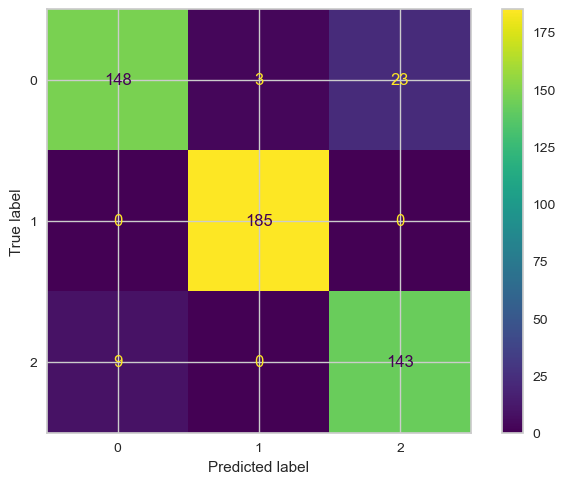

Accuracy on Train data :  1.0
Accuracy on Test data :  0.9315068493150684


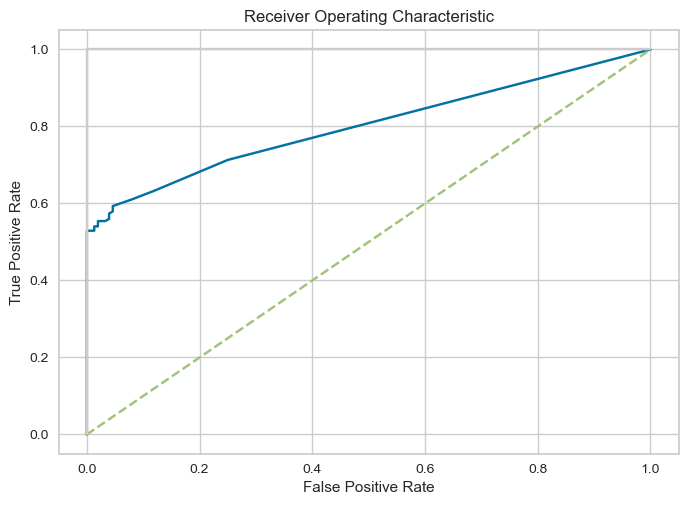

In [50]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train,pos_label=2))

# print('Recall :',recall_score(X_train_prediction,Y_train,pos_label=2))

# print('F1 score : ', f1_score(X_train_prediction,Y_train,pos_label=2))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test,pos_label=2))

# print('Recall :',recall_score(X_test_prediction,Y_test,pos_label=2))

# print('F1 score : ', f1_score(X_test_prediction,Y_test,pos_label=2))

## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)


#calculate false & true positive rates

fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1],pos_label=2)


#construct plot

plt.plot(tpr,fpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


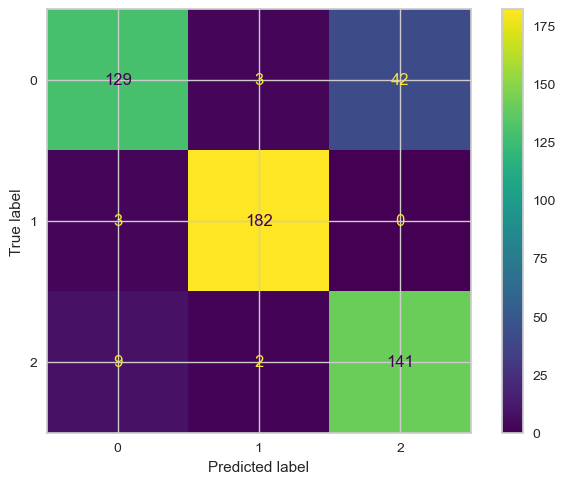

Accuracy on Train data :  0.9580536912751678
Presion : 0.9567017183180764
Recall : 0.9591762398430933
F1 score :  0.9560183575551074
Accuracy on Test data :  0.8845401174168297
Presion : 0.8842648910253267
Recall : 0.8862158174618422
F1 score :  0.8797777624932176


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] t

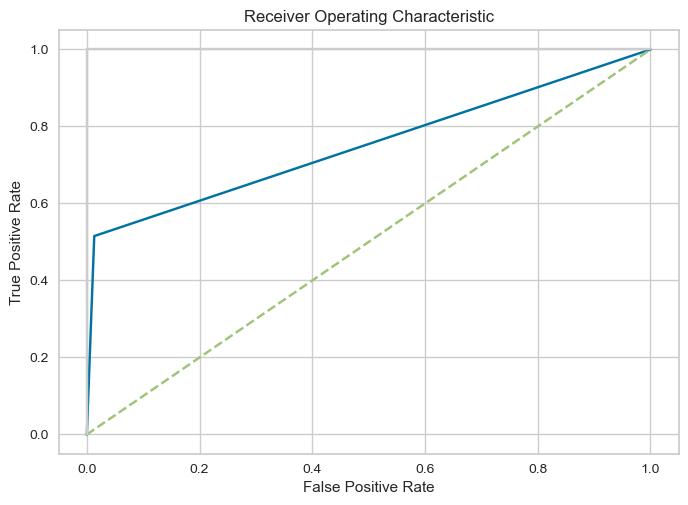

In [51]:
modelRF = DecisionTreeClassifier(max_depth=9)
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train,pos_label=2,average='macro'))

print('Recall :',recall_score(X_train_prediction,Y_train,pos_label=2,average='macro'))

print('F1 score : ', f1_score(X_train_prediction,Y_train,pos_label=2,average='macro'))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test,pos_label=2,average='macro'))

print('Recall :',recall_score(X_test_prediction,Y_test,pos_label=2,average='macro'))

print('F1 score : ', f1_score(X_test_prediction,Y_test,pos_label=2,average='macro'))

## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1],pos_label=2)
#construct plot
plt.plot(tpr,fpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


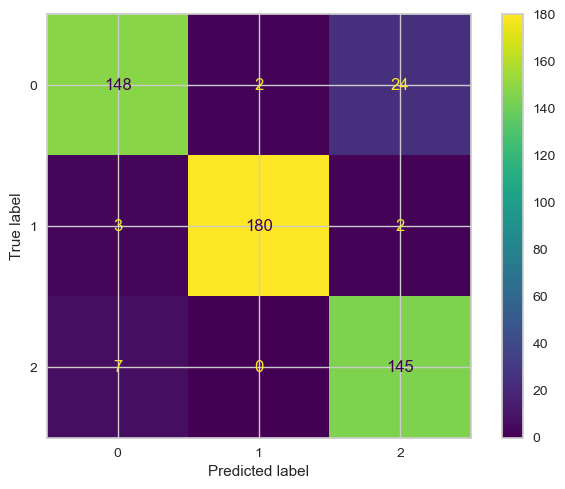


Results obtained for the XGB

Results obtained on Training Data
Accuracy on Train data :  1.0

Results obtained on Testing Data
Accuracy on Test data :  0.9256360078277887


In [52]:
modelXGB=XGBClassifier()
modelXGB.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelXGB, X_test, Y_test)  
plt.show() 

# Accuracy on training data
X_train_prediction = modelXGB.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the XGB')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# Accuracy on test data
X_test_prediction = modelXGB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.p

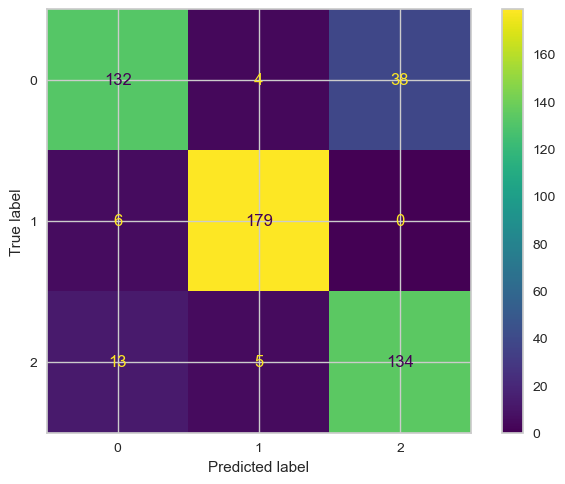

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves 


Results obtained for the knn

Results obtained on Training Data
Accuracy on Train data :  0.9077181208053692
Presion : 0.9041693575822265
Recall : 0.9060292543795984
F1 score :  0.9031880463157774

Results obtained on Testing Data
Accuracy on Test data :  0.8708414872798435
Presion : 0.8692557348637203
Recall : 0.8684565374822641
F1 score :  0.8664179029743523


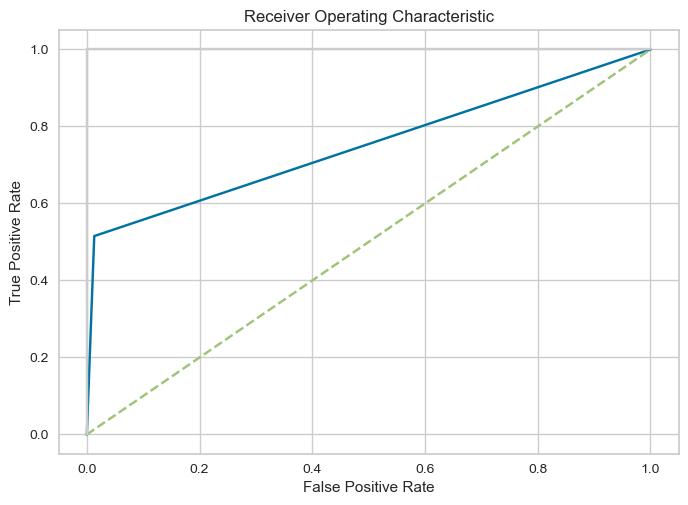

In [53]:
#knn
modelknn=KNeighborsClassifier()
modelknn.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = modelknn.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

plot_confusion_matrix(modelknn, X_test, Y_test)  
plt.show() 

print('\nResults obtained for the knn')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train,pos_label=2,average='macro'))

print('Recall :',recall_score(X_train_prediction,Y_train,pos_label=2,average='macro'))

print('F1 score : ', f1_score(X_train_prediction,Y_train,pos_label=2,average='macro'))

# Accuracy on test data
X_test_prediction = modelknn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test,pos_label=2,average='macro'))

print('Recall :',recall_score(X_test_prediction,Y_test,pos_label=2,average='macro'))

print('F1 score : ', f1_score(X_test_prediction,Y_test,pos_label=2,average='macro'))

## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1],pos_label=2)
#construct plot
plt.plot(tpr,fpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
from sklearn import svm
#create a classifier
modelsvm = svm.SVC(kernel="linear")
#train the model
modelsvm.fit(X_train,Y_train)
#predict the response
# pred = modelsvm.predict(X_test)

# #knn
# modelknn=KNeighborsClassifier()
# modelknn.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = modelsvm.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the knn')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

# Accuracy on test data
X_test_prediction = modelsvm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)



Results obtained for the knn

Results obtained on Training Data
Accuracy on Train data :  0.700503355704698

Results obtained on Testing Data
Accuracy on Test data :  0.684931506849315


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


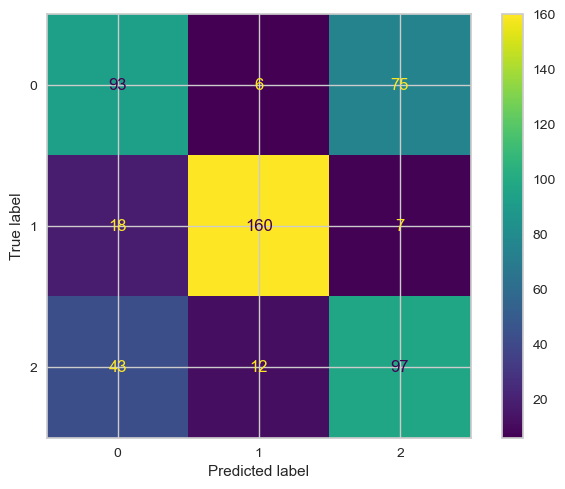

Accuracy on Train data :  0.700503355704698
Presion : 0.6915741532276481
Recall : 0.6911986766786647
F1 score :  0.6913424483445634
Accuracy on Test data :  0.684931506849315
Presion : 0.6791685060741322
Recall : 0.6815573165770893
F1 score :  0.6782395298298193


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] t

In [55]:
modelSVM=SVC(kernel='linear')
modelSVM.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelSVM, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train,pos_label=2,average='macro'))

print('Recall :',recall_score(X_train_prediction,Y_train,pos_label=2,average='macro'))

print('F1 score : ', f1_score(X_train_prediction,Y_train,pos_label=2,average='macro'))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test,pos_label=2,average='macro'))

print('Recall :',recall_score(X_test_prediction,Y_test,pos_label=2,average='macro'))

print('F1 score : ', f1_score(X_test_prediction,Y_test,pos_label=2,average='macro'))   